<center> <h2 style="background-color:orange"><br>Applying Cool Pair of Glasses by building Snapchat Filter using OpenCV<br></h2></center>

` Let's build a cool filter just like that completely on your own`



OpenCV is an extremely useful open-sourced python library that primarily deals with real-time 
* Machine learning
* Computer Vision
* Image Processing

OpenCV has numerous functions that can be used to 
* Identify objects
* Recognize facial features
* Process images and videos and even modify them



Fields in which OpenCV finds its application are:

1. Face Detection
2. Medical image analysis
3. Navigation of Driver-less car
4. Interactive art installations
5. Image/Video search and retrieval

In order to build Glasses Snapchat filter, will focus on 
* Detection of Facial Features using OpenCV with Haar Cascade Classifiers

<a id='1'></a><center> <h4 style="background-color:blue; color:white"><br>Haar Cascades [1]<br></h4></center>



Haar Cascade is one of `most popular object detection algorithms`

It makes use of various features such as:
1. Edge Features
2. Line Features
3. Centre-Surround Features 
All of above 3-points to locate similar patterns in images and hence identify objects

**Example:** 
* `Edges of lips` are generally distinct with `side of lips` being darker than skin so 
    * a horizontal Edge feature may be used
* A vertical edge feature may be used to detect bridge of nose


![](https://qph.fs.quoracdn.net/main-qimg-3da6dae944492ef1524bc43f58f6c54a)


![](https://www.researchgate.net/profile/Qingfeng_Zhang5/publication/335337272/figure/download/fig1/AS:794902606671872@1566530958528/Haar-like-features-1-edge-features-2-line-features-3-center-surround-features.jpg)

Using a cascade that will help us detect frontal eyes in an image
* download Haar cascades first

In [185]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

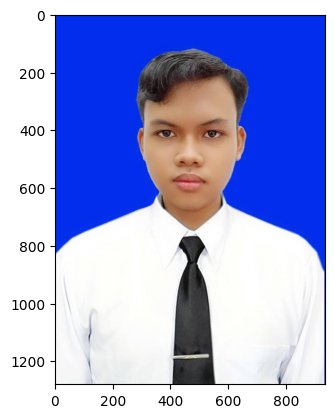

In [186]:
path = 'D:\\BANGKIT\\CAPSTONE\\wajah\\'
img = plt.imread(path + "img3.jpeg")
plt.imshow(img)
plt.show()

In [187]:
###---4 - BGRA image--
img.shape

(1280, 934, 3)

In [188]:
img1 = img.copy()

In [189]:
###---Loading Cascades---
#cascade_path = '../input/images/haarcascade_eye.xml'
cascade_path = 'D:\\BANGKIT\\CAPSTONE\\frontalEyes35x16.xml'
eye_cascade = cv2.CascadeClassifier(cascade_path)

Trying to identify eyes in image with the help of `detectMultiScale() method` using eye_cascade defined object 
* will pass input image as a parameter
* This shall help us locate the pair of eyes in our images

In [190]:
eye = eye_cascade.detectMultiScale(img)
eye

array([[321, 349, 284, 130]])

Location of eyes in `format (x,y,w,h)`

* x stands for the X coordinate of the bottom left corner
* y stands for the Y coordinate of the bottom left corner
* w stands for the width of the eye region
* h stands for the height of the eye region

NOW:
1. Draw Rectangle --> cv2.rectangle
2. Choose color --> (0,255,255)
3. Width of rectangle --> 5

In [191]:
###---obtained eye co-ordinates---
eye_x, eye_y, eye_w, eye_h = eye[0]
eye_x, eye_y, eye_w, eye_h

(321, 349, 284, 130)

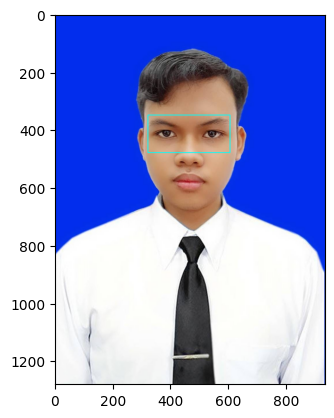

In [192]:
img = cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (0,255,255), 2)
plt.imshow(img)
plt.show()

(709, 1559, 4)

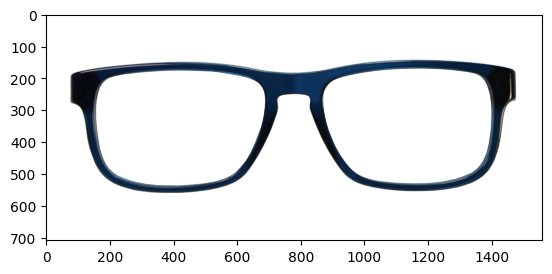

In [193]:
###---Reading filter iamge i.e. of glass--
glasses_filter =plt.imread("D:\\BANGKIT\\CAPSTONE\\kacamata\\10.png")

plt.imshow(glasses_filter)
plt.show
glasses_filter.shape

(185, 334, 4)

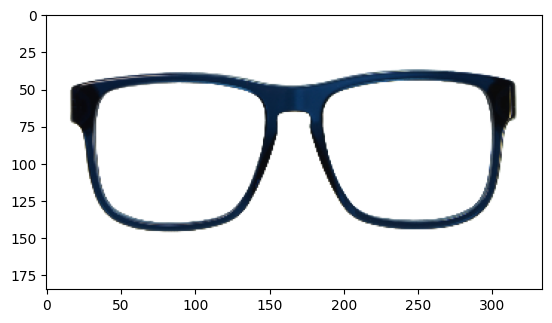

In [194]:
###---new updated cordinates of filter based on image---
glasses_filter_updated = cv2.resize(glasses_filter,(eye_w+50,eye_h+55))

plt.imshow(glasses_filter_updated)
plt.show
glasses_filter_updated.shape

Replace pixels of rectangle on image with pixels of glass filter

* If pixel on glasses filter image is 0 that means, we want that portion to be transparent, so we do not replace that pixel
* In all other cases, we simply replace pixel of image with pixel of glasses filter at desired location

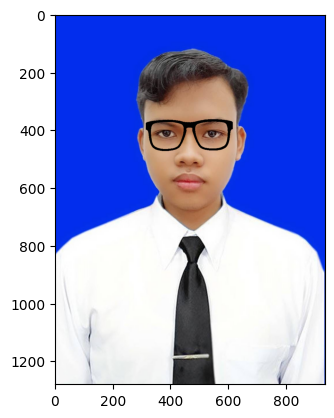

In [195]:
index_0 = glasses_filter_updated.shape[0]
index_1 = glasses_filter_updated.shape[1]
for i in range(index_0):
    for j in range(index_1):
        if (glasses_filter_updated[i,j,3] > 0):
            img1[eye_y+i-22, eye_x+j-23, :] = glasses_filter_updated[i,j,:-1]
            
plt.imshow(img1)
plt.show()